### Other classification algorithm
#### DecisionTrees - graphviz

#### RandomForests - multiple decision trees , helpful in avoiding overfitting
#### Principal Component Analysis - alternate of one hot encoding, if we have too many columns 
#### DNN  - RNN - some twist on LSTM
#### Tensorflow, pytorch, keras, sklearn for regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Time series analysis

In [3]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")
# Reading the data
AirPassengers = pd.read_csv('AirPassengers.csv', 
                            parse_dates=[0]) # Marking first column to datetype format
# Summary of the data
AirPassengers.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [6]:
AirPassengers.head()

,Travel date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


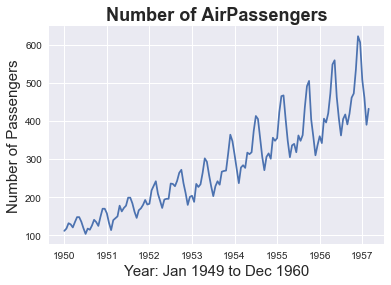

In [7]:
# Feching years
year = AirPassengers['Travel date'].dt.year
# Visualizing the time-series
fig, ax = plt.subplots()
ax.plot(AirPassengers.Passengers)
ax.set_title('Number of AirPassengers', weight='bold', fontsize=18) # Title
ax.set_ylabel('Number of Passengers', fontsize=15)
ax.set_xlabel('Year: Jan 1949 to Dec 1960', fontsize=15)
ax.set_xticklabels(np.unique(year))
fig.show()

### This data is increasing continously , but it is also possible that it has conditional variance, like mean is increasng over time, but variance is increasing conditionally like holiday season

In [8]:
### time series - data taken at successively equal spaced points
### Yt = Y(t-1) + Et
### Yt is observed value in time 't'
### Et- error at time t

In [9]:
### To perform time series analysis, we need Stationary time series data
## which means mean,variabncem co varinace needs to be stationary not increasing/decreasing linearly
## current regression models do not predict peaks and falls very well

##### Analyzing the past data can be done by keeping in mind the following factors: 

* Trend: show a long term increase or decrease in data
* Seasonal: when the data is affected by seasonal factors
* Cyclic: data shows fluctuations across any period of time
* Random: If the above 3 components are missing in a data

## Extract trend and seasonality and noise - Decomposition 
* Additive model - seasonal variation is constant over time,additive nature= Trend+season+noise

In [11]:
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
AirPassenger = pd.read_csv('AirPassengers.csv', index_col='Travel date', date_parser=dateparse)
AirPassenger.head()

,Passengers
Travel date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose


In [13]:
AirPassenger.values.reshape(-1, 12)

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
       [115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140],
       [145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166],
       [171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194],
       [196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201],
       [204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229],
       [242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278],
       [284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306],
       [315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336],
       [340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337],
       [360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405],
       [417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]], dtype=int64)

In [14]:
# Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
AP_reshaped = pd.DataFrame(AirPassenger.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_reshaped

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [16]:
# Extracting the seasonal values
seasonal_data = np.round(seasonal_decompose(AirPassenger, model='additive').seasonal, 2)
seasonal_data.head()

,Passengers
Travel date,
1949-01-01,-24.75
1949-02-01,-36.19
1949-03-01,-2.24
1949-04-01,-8.04
1949-05-01,-4.51


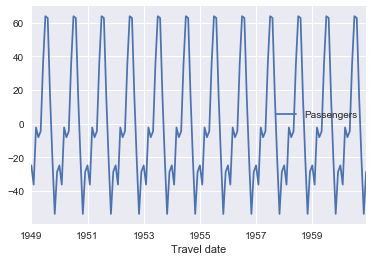

In [18]:
seasonal_decompose(AirPassenger, model='additive').seasonal.plot()

In [17]:
# Getting output corresponding to each month
AP_season = pd.DataFrame(seasonal_data.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_season

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1950,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1951,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1952,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1953,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1954,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1955,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1956,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1957,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1958,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62


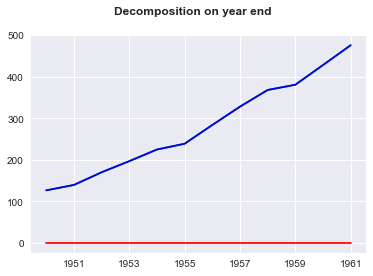

In [39]:
## Do this for year end seasonal
## Resample is convert current time data by re-sampling by getting mean of each year
 ##- can be done in quarter(mean of all passenger in quarter/year etc)
fig,ax = plt.subplots()
AP_Year=AirPassenger.resample('A').mean()
ax.plot(seasonal_decompose(AP_Year, model='additive').seasonal , c='r')
ax.plot(seasonal_decompose(AP_Year, model='additive').observed , c='g')
ax.plot(seasonal_decompose(AP_Year, model='additive').trend, c='b')
## ax.plot(seasonal_decompose(AP_Year, model='additive').Residual)
plt.suptitle('Decomposition on year end', weight='bold')
plt.show()

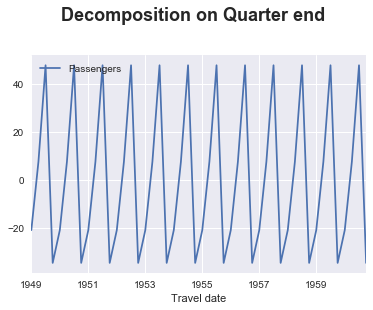

In [22]:
## Do this for quarter end seasonal
AP_Quarter=AirPassenger.resample('Q').mean()
seasonal_decompose(AP_Quarter,model='additive').seasonal.plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()

In [30]:
## Decomposition with deseasonalized data
AP_Deseasonalized = AP_reshaped - AP_season
AP_Deseasonalized.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,136.75,154.19,134.24,137.04,125.51,99.6,84.17,85.18,119.48,139.64,157.59,146.62
1950,139.75,162.19,143.24,143.04,129.51,113.6,106.17,107.18,141.48,153.64,167.59,168.62
1951,169.75,186.19,180.24,171.04,176.51,142.6,135.17,136.18,167.48,182.64,199.59,194.62
1952,195.75,216.19,195.24,189.04,187.51,182.6,166.17,179.18,192.48,211.64,225.59,222.62
1953,220.75,232.19,238.24,243.04,233.51,207.6,200.17,209.18,220.48,231.64,233.59,229.62


In [34]:
## take each column and make it a row - creates column named variable
AP_Deseasonlized_melt=pd.melt(AP_Deseasonalized.T)
AP_Deseasonlized_melt.head()

,variable,value
0,1949,136.75
1,1949,154.19
2,1949,134.24
3,1949,137.04
4,1949,125.51


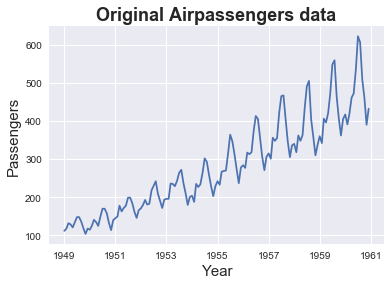

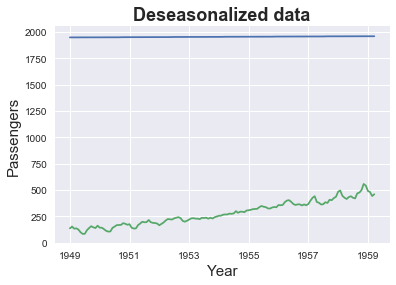

In [47]:
plt.plot(AirPassenger)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Original Airpassengers data', weight='bold', fontsize=18)
plt.show()

plt.plot(AP_Deseasonlized_melt.values)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)

plt.xticks(np.linspace(0, 140, 6), np.unique(AP_Deseasonlized_melt.variable)[::2])

plt.show()

#### Multiplicative model
* Trend x season x noise
* Time Series Data = (Seasonal) * (Trends) * (Random)

 * Time Series Data/(Seasonal) = (Trends) * (Random)

* So the seasonally adjusted value is (405/0.9), i.e. 450.5886

In [40]:
# Extracting the seasonal values
seasonal_data_mult = np.round(seasonal_decompose(AirPassenger, model='multiplicative').seasonal, 2)
# Getting output corresponding to each month
AP_season_mult = pd.DataFrame(seasonal_data_mult.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_season_mult

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1950,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1951,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1952,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1953,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1954,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1955,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1956,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1957,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1958,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9


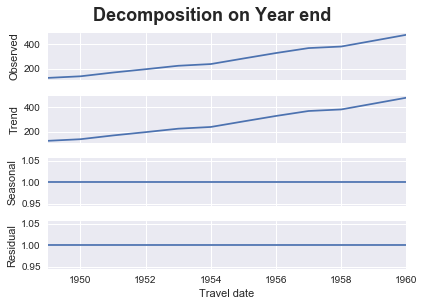

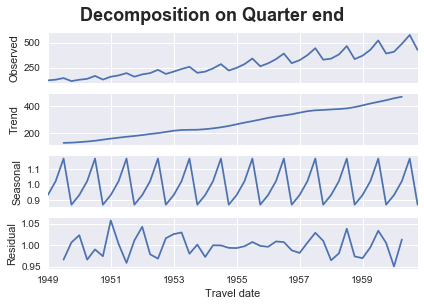

In [41]:
# Decomposition of Airpassengers data on year end taking mean of monthly values
year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='multiplicative').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()
# Decomposition of Airpassengers data on quarter end taking mean of monthly values
quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
seasonal_decompose(quarter_end, model='multiplicative').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()

In [44]:
# Multiplicative Deseasonalized data
AP_deseasonalized_mult = np.round(AP_reshaped / AP_season_mult, 2)
AP_deseasonalized_mult

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,123.08,134.09,130.69,131.63,123.47,121.62,120.33,121.31,128.30,129.35,130.00,131.11
1950,126.37,143.18,139.60,137.76,127.55,134.23,138.21,139.34,149.06,144.57,142.50,155.56
1951,159.34,170.45,176.24,166.33,175.51,160.36,161.79,163.11,173.58,176.09,182.50,184.44
1952,187.91,204.55,191.09,184.69,186.73,196.40,186.99,198.36,197.17,207.61,215.00,215.56
1953,215.38,222.73,233.66,239.80,233.67,218.92,214.63,222.95,223.58,229.35,225.00,223.33
1954,224.18,213.64,232.67,231.63,238.78,237.84,245.53,240.16,244.34,248.91,253.75,254.44
1955,265.93,264.77,264.36,274.49,275.51,283.78,295.93,284.43,294.34,297.83,296.25,308.89
1956,312.09,314.77,313.86,319.39,324.49,336.94,335.77,331.97,334.91,332.61,338.75,340.00
1957,346.15,342.05,352.48,355.10,362.24,380.18,378.05,382.79,381.13,377.17,381.25,373.33
1958,373.63,361.36,358.42,355.10,370.41,391.89,399.19,413.93,381.13,390.22,387.50,374.44


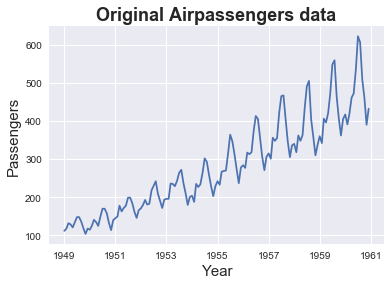

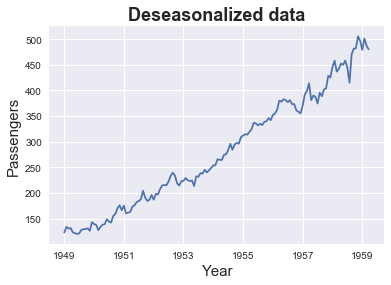

In [46]:
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(AirPassenger)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Original Airpassengers data', weight='bold', fontsize=18)
plt.show()
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(pd.melt(AP_deseasonalized_mult.T).value)
plt.xticks(np.linspace(0, 140, 6), np.unique(pd.melt(AP_deseasonalized_mult.T).variable)[::2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()

#### Even after deseasonlizing, we still see the peaks - This is where we need smoothing

#### smoothing by moving average - take average of first 4 months - result is new point for 4th month, keep going for all months and all years
* this is 4 month moving average, we can do this for 8, also
* MA =   ( α(0)y(t) + α(1)y(t -1) + … + α(n-1) y(t -n) ) / n
    * 'α' is the weight assigned to the data
    * 'yt' is the last day data(latest data)
    * 'n' is the time period for which we want to calculate the moving Average.

In [49]:
## $ period moving average
AP_movingavg = pd.rolling_mean(AirPassenger, 4, center=False)
AP_movingavg.head()

,Passengers
Travel date,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,122.75
1949-05-01,125.00


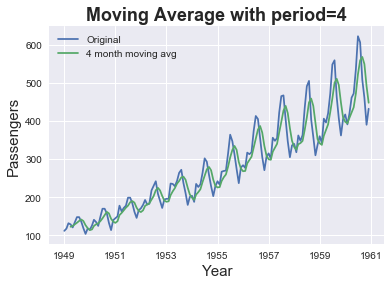

In [50]:
plt.plot(AirPassenger, label="Original")

plt.plot(AP_movingavg , label="4 month moving avg")

plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=4', weight='bold', fontsize=18)
plt.show()

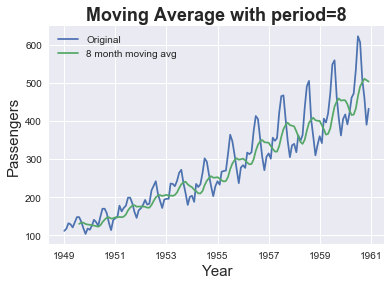

In [52]:
plt.plot(AirPassenger , label='Original')
plt.plot(pd.rolling_mean(AirPassenger, 8, center=False) , label='8 month moving avg')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=8', weight='bold', fontsize=18)
plt.show()

#### Centered Moving Average
* trend line is asymmetric in simple moving average. For n period moving average the first n-1 terms are missing
* We can make the trend line symmetric by placing the average in the middle of the time series
* this works well for odd period moving average than even period moving average
* point is moved in center instead of end, like in normal moving avg

* Weighted moving avg- if we need to give some month more weightage

In [63]:
AirPassenger['4 point CMA'] = pd.rolling_mean(AirPassenger.iloc[1:12], 3, center = True)
AirPassenger[['Passengers','4 point CMA']].head(12)

,Passengers,4 point CMA
Travel date,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,126.333333
1949-04-01,129,127.333333
1949-05-01,121,128.333333
1949-06-01,135,134.666667
1949-07-01,148,143.666667
1949-08-01,148,144.000000
1949-09-01,136,134.333333


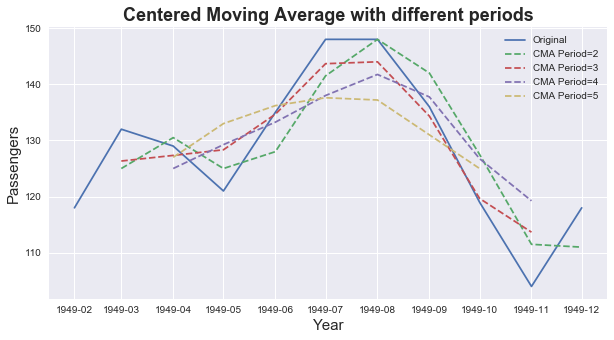

In [54]:
# Centered Moving Averages
plt.figure(figsize=(10, 5))

## First 12 months data - one year (1949)
plt.plot(AirPassenger.iloc[1:12], label='Original')

plt.plot(pd.rolling_mean(AirPassenger.iloc[1:12], 2, center = True), '--', label='CMA Period=2')
plt.plot(pd.rolling_mean(AirPassenger.iloc[1:12], 3, center = True), '--', label='CMA Period=3')
plt.plot(pd.rolling_mean(AirPassenger.iloc[1:12], 4, center = True), '--', label='CMA Period=4')
plt.plot(pd.rolling_mean(AirPassenger.iloc[1:12], 5, center = True), '--', label='CMA Period=5')

plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Centered Moving Average with different periods', weight='bold', fontsize=18)
plt.show()
 

#### Exponential smoothing
* works on the original data in order to identify trend patterns. 
* Exponential smoothing equation:
*   St= αy(t)+ (1 - α) S(t-1)
*   St= αy(t)+ α(1-α) y(t-1)+ α(1-α)2 y(t-2)+ …+(1-α)(t-1) y(1) (Expanded)
*   St is a exponentially smoothed time series at 't', where 't' > 0.
*   'y(t)' denotes the latest observation in the series at period 't' and 'y1'is the first observation.
*   'α' is a smoothing constant (alpha). between 0 and 1

In [73]:
 pd.ewma(AirPassenger.iloc[:12], alpha=0.2)

    ## Jan original - 112
    ## Feb - Original - 118, Mar original 132
    ## alpha=0.2
    ## Feb new value = 0.2*118 + (1-0.2)112 = 113.2
    ## Mar new value = 0.2*132 + (1-0.2)113.2 = 116.96
    
    ## Below values are not as per formaula - pandas ewma doc needs to be checked

,Passengers,4 point CMA
Travel date,,
1949-01-01,112.000000,NaN
1949-02-01,115.333333,NaN
1949-03-01,122.163934,126.333333
1949-04-01,124.479675,126.888889
1949-05-01,123.444550,127.480874
1949-06-01,126.576720,129.915086
1949-07-01,131.998380,134.005870
1949-08-01,135.843870,136.714835
1949-09-01,135.879937,136.112141


In [78]:
from statsmodels.tsa import holtwinters

ImportError: cannot import name 'holtwinters'

In [80]:
!pip install -U statsmodels

Requirement already up-to-date: statsmodels in c:\programdata\anaconda3\lib\site-packages


Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x00000115F87B6B00>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /simple/statsmodels/
Retrying (Retry(total=3, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x00000115F87B6D68>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /simple/statsmodels/
Retrying (Retry(total=2, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x00000115F890B3C8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /simple/statsmodels/
Retrying (Retry(total=1, connect=None, read=None, re

In [74]:
''' Exponential smoothing for March takes the estimated value of March (113.2) and the observed value of March (132).
The exponentially smoothed value for December 1949 is 123.40; this value is considered as the forecasted value for January 1950.'''

' Exponential smoothing for March takes the estimated value of March (113.2) and the observed value of March (132).\nThe exponentially smoothed value for December 1949 is 123.40; this value is considered as the forecasted value for January 1950.'

##### In unforeseen situations such as natural calamities and economy crashes, there may a sudden shift in the observed data.
###### By setting alpha to a larger value we give more weight to these observations and less weight to the forecasted values.
###### choosing correct alpha value is imp. formula
###### minimum MSE (Mean Square Error)

In [85]:
## Below, we have computed the MSE with different alpha values for December 1959(405). 
## Alpha may take an infinite number of values between 0 and 1. We have shown a sample of 10 alpha 
##     values and forecasted value for December 1959.


In [82]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
for i in range(1, 11):
    model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=i/10, optimized=False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    print('alpha = ', i/10, '| Forecasted value: ', forecasted_val, 
          '| MSE: ', np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2))

ModuleNotFoundError: No module named 'statsmodels.tsa.holtwinters'

In [86]:

## Get optimum alpha, and take range again to see ultimate best alpha point
## example, if alpha 0.5 has least MSE, run loop for 0.4 to 0.6 and see best point witin this range and so on
## Function ultimate gives best alpha with 0 MSE

In [84]:
import scipy as sp
def optimum_alpha(x):
    model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=x)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    mse = np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2)
    print('alpha: ', np.round(x[0], 5), 'MSE: ', mse)
    return mse
optimum_alpha_result = sp.optimize.fmin(optimum_alpha, x0=1)
if optimum_alpha_result < 0:
    optimum_alpha_result = 0.001 # Least value, you can perform further optimization to improve it
optimum_alpha_result    


NameError: name 'SimpleExpSmoothing' is not defined

In [89]:
## simple explonential does not understand series data without passing prev data. 
## So predicting feb 1960 value wont give anything if it dont have jan 1960
## So model gives same data for all the months.
## this is why simple exponential is good only for single off forecasting value, not series
## Smoothing techniques can be utilized for short term predictions. In order to perform long term predictions, 
## like forecasting values for 1 or 2 years, we need to use advanced methods

#### Forecasting
* Seasonal Indexing
* Autoregressive
* Moving Average
* Autoregressive moving average
* Autoregressive integrated moving average

In [90]:
### Stationary time series - all mean, var,co-var is constant
## Differentiave is series which is not stationary

### Below are the steps to compute Difference:
### Diff(1) = AirPassengers[n] – AirPassengers[n-1]
### Diff(2) = Diff(1)[n] – Diff(1)[n-1]
### Lag is the delay in the series, below are the steps to compute lag:
### Lag(1) = AirPassengers[n] – AirPassengers[n-1]
### Lag(2) = AirPassengers[n] – AirPassengers[n-2]

In [91]:
# Taking year 1949 data
st = pd.DataFrame(AirPassenger.iloc[:12].T.values[0], columns=['Year 1949'], index=cols)
# Lag 1
st['lag1'] = AirPassenger.iloc[:12].diff(1).T.values[0]
# Lag 2
st['lag2'] = AirPassenger.iloc[:12].diff(2).T.values[0]
# Difference with order 1
st['diffOrd1'] = np.concatenate(([np.nan], np.diff(AirPassenger.iloc[:12].T.values[0], 1)))
# Difference with order 2
st['diffOrd2'] = np.concatenate(([np.nan, np.nan], np.diff(AirPassenger.iloc[:12].T.values[0], 2)))
st

,Year 1949,lag1,lag2,diffOrd1,diffOrd2
Jan,112.0,NaN,NaN,NaN,NaN
Feb,118.0,6.0,NaN,6.0,NaN
Mar,132.0,14.0,20.0,14.0,8.0
Apr,129.0,-3.0,11.0,-3.0,-17.0
May,121.0,-8.0,-11.0,-8.0,-5.0
Jun,135.0,14.0,6.0,14.0,22.0
Jul,148.0,13.0,27.0,13.0,-1.0
Aug,148.0,0.0,13.0,0.0,-13.0
Sep,136.0,-12.0,-12.0,-12.0,-12.0
Oct,119.0,-17.0,-29.0,-17.0,-5.0


In [93]:
np.diff(AirPassenger.T.values[0])

array([   6.,   14.,   -3.,   -8.,   14.,   13.,    0.,  -12.,  -17.,
        -15.,   14.,   -3.,   11.,   15.,   -6.,  -10.,   24.,   21.,
          0.,  -12.,  -25.,  -19.,   26.,    5.,    5.,   28.,  -15.,
          9.,    6.,   21.,    0.,  -15.,  -22.,  -16.,   20.,    5.,
          9.,   13.,  -12.,    2.,   35.,   12.,   12.,  -33.,  -18.,
        -19.,   22.,    2.,    0.,   40.,   -1.,   -6.,   14.,   21.,
          8.,  -35.,  -26.,  -31.,   21.,    3.,  -16.,   47.,   -8.,
          7.,   30.,   38.,   -9.,  -34.,  -30.,  -26.,   26.,   13.,
         -9.,   34.,    2.,    1.,   45.,   49.,  -17.,  -35.,  -38.,
        -37.,   41.,    6.,   -7.,   40.,   -4.,    5.,   56.,   39.,
         -8.,  -50.,  -49.,  -35.,   35.,    9.,  -14.,   55.,   -8.,
          7.,   67.,   43.,    2.,  -63.,  -57.,  -42.,   31.,    4.,
        -22.,   44.,  -14.,   15.,   72.,   56.,   14., -101.,  -45.,
        -49.,   27.,   23.,  -18.,   64.,  -10.,   24.,   52.,   76.,
         11.,  -96.,

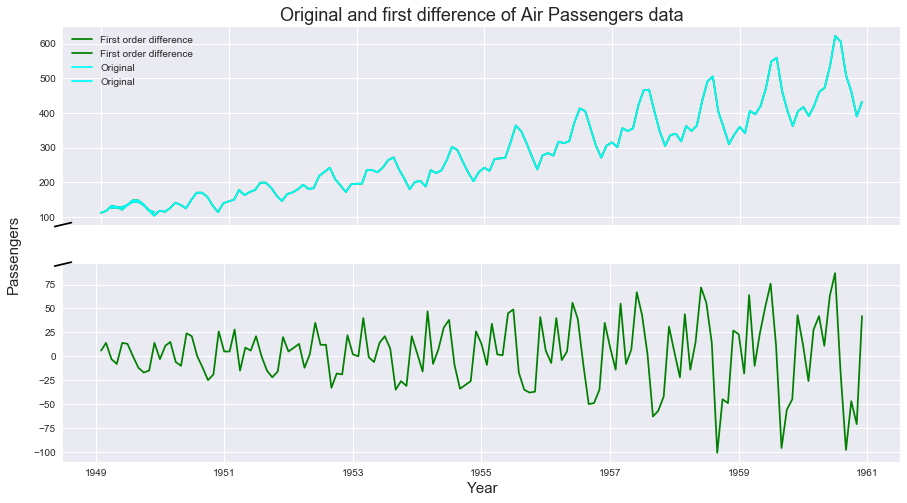

In [96]:
# First order difference values
diffOrd1 = pd.DataFrame(np.concatenate(([np.nan], np.diff(AirPassenger.T.values[0], 1))), index=AirPassenger.index)

plt.figure(1, figsize=(15, 8))
ax1 = plt.subplot2grid((2, 1), (0, 0))
# Dummy plot, used to create legend label for second plot
ax1.plot(AirPassenger, label="First order difference", c='g') 
ax1.plot(AirPassenger, label='Original', c='cyan')
ax1.set_title('Original and first difference of Air Passengers data', fontsize=18)

# Removing bottom, top and right plot lines
ax1.spines['bottom'].set_visible(False) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Removing ticks and labels of x-axis
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# Adding a diagonal mark on y-axis
d = .01 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d,d),(-d,+d), **kwargs) 
plt.legend()


# Generating second plot
ax2 = plt.subplot2grid((2, 1), (1, 0))
ax2.plot(diffOrd1, c='g')
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Passengers', fontsize=15)
plt.legend()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d,d),(1-d,1+d), **kwargs) 
# Adding a common y-label
ax2.yaxis.set_label_coords(-0.05, 1.05)
plt.show()

In [97]:
## np log of data will give constant variance

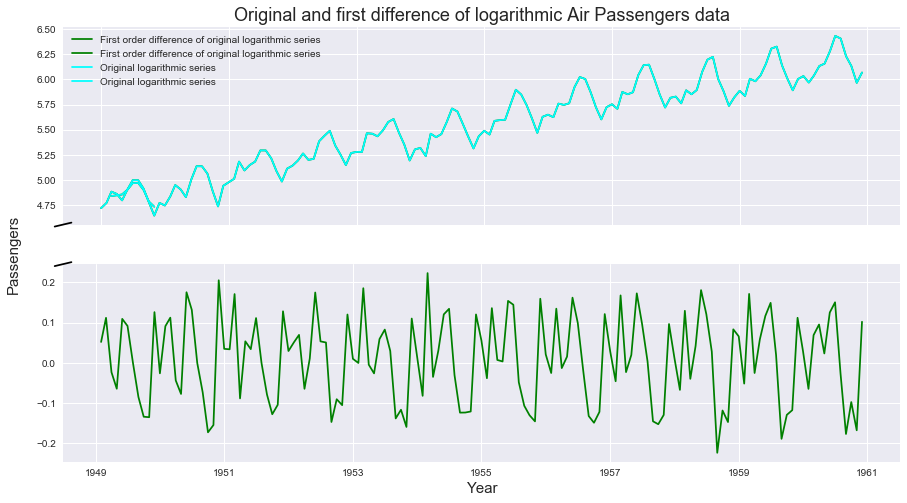

In [98]:
# First order difference values of logarithmic series
diffOrd1 = pd.DataFrame(np.concatenate(([np.nan], np.diff(np.log(AirPassenger).T.values[0], 1))), index=AirPassenger.index)
plt.figure(1, figsize=(15, 8))
ax1 = plt.subplot2grid((2, 1), (0, 0))
# Dummy plot, used to create legend label for second plot
ax1.plot(np.log(AirPassenger), label="First order difference of original logarithmic series", c='g') 
ax1.plot(np.log(AirPassenger), label='Original logarithmic series', c='cyan')
ax1.set_title('Original and first difference of logarithmic Air Passengers data', fontsize=18)
# Removing bottom, top and right plot lines
ax1.spines['bottom'].set_visible(False) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Removing ticks and labels of x-axis
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# Adding a diagonal mark on y-axis
d = .01 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d,d),(-d,+d), **kwargs) 
plt.legend()
# Generating second plot
ax2 = plt.subplot2grid((2, 1), (1, 0))
ax2.plot(diffOrd1, c='g')
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Passengers', fontsize=15)
plt.legend()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d,d),(1-d,1+d), **kwargs) 
# Adding a common y-label
ax2.yaxis.set_label_coords(-0.05, 1.05)
plt.show()

###### Homework - how to convert co-variance as constant

In [110]:
### ADF test for stationary - to test if series is stationary
##### hypothsis testing - Dickey-Fuller test to quickly analyze if a series is stationary or not without visualization. 

###We can check the stationarity of the series by using the Dickey-Fuller test. It uses the hypothesis 
    ## testing for checking the stationarity of a series as mentioned below. 
##Hnull  : series is non-stationary
##Halt : series is stationary

In [103]:
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
#hsales = pd.read_csv('AirPassengers.csv', index_col='date', date_parser=dateparse)
from statsmodels.tsa.stattools import adfuller
def dffunc(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series([dftest[0],dftest[1], dftest[4]["5%"],dftest[5]],
                         index=['Test Statistic','p-value', 'Critical Value at 5%','AIC'])
    return(dfoutput)
# Passing values as 1D numpy array
dffunc(AirPassenger.T.values[0])

## The series is stationary if the p-values is less than 0.05
## Our value is 0.99 , so our series is accepted as not-stationary

Test Statistic            0.815369
p-value                   0.991880
Critical Value at 5%     -2.884042
AIC                     996.692931
dtype: float64

In [108]:
# Dickey-Fuller test of first order difference of log transformed Air passengers data

dffunc(np.diff(np.log(AirPassenger).T.values[0], 1))

## Adding first order diff, p improved

Test Statistic           -2.717131
p-value                   0.071121
Critical Value at 5%     -2.884398
AIC                    -440.358470
dtype: float64

In [109]:
# Dickey-Fuller test of second order difference of log transformed Air passengers data
dffunc(np.diff(np.log(AirPassenger).T.values[0], 2))

### This time the p-value(7.41e-13) is much smaller than 0.05 and hence the series has become stationary.

Test Statistic         -8.196629e+00
p-value                 7.419305e-13
Critical Value at 5%   -2.884398e+00
AIC                    -4.308936e+02
dtype: float64

### Auto-Regressive model
#### Autoregressive model works only on stationary data and is used to examine the relationship between different values of the same variable. It is a linear model that can be used to predict future values based on past and present values. 

##### It is represented as AR(p), where p denotes the order or the number of observations considered.
##### AR(p) :  y(t) = β(0) + β(1)y(t-1) + β(2)y(t-2) + β(3)y(t-3) + … + β(p)y(t-p)+ ε(t)
##### Where 'β' is the coefficient & 'ε' is an error.
##### For p=1 and p=3
##### AR(1)  :  y(t) = β0 + β1y(t-1)+ ε(t)
##### AR(3)  :  y(t) = β0 + β1y(t-1) + β2y(t-2) + β3y(t-3)+ ε(t)

##### PACF - to determine optimum value of p on this 

In [112]:
from statsmodels.tsa.ar_model import AR

In [127]:
AirPassenger.drop('4 point CMA',inplace=True,axis=1)

In [128]:
ar=AR(AirPassenger)
ar.fit()

In [142]:

# make predictions 
predictions = ar.predict(AirPassenger,
    start=len(AirPassenger), 
    end=len(AirPassenger) + len(AirPassenger)-1, 
    dynamic=False)
predictions

ValueError: shapes (131,14) and (144,1) not aligned: 14 (dim 1) != 144 (dim 0)

#### Moving avg model
##### SAme as AR, uses pass error rates to predict future value
* Here ε(t) represents the error at time 't'. It is an independent and identically distributed data.
* MA(q) :  y(t) = β(0) + α(0)ε(t) + α(1)ε(t-1) + α(2)ε(t-2) + α(3)ε(t-3) + … + α(q)ε(t-q)   
* Here, q denotes the order of the moving average.
* Moving average is represented as MA(q), where q is the order of the model, which indicates how many previous errors we consider to predict the present data
* MA(1)  :  y(t) = β0 + α0ε(t) + α1ε(t-1)
* MA(3)  :  y(t) = β0 + α0ε(t) + α1ε(t-1) + α2ε(t-2) + α3ε(t-3)
* Where 'β0' and 'α' are the coefficient & 'ε' is a error term with mean zero and a constant variance.

#### ARMA model
#### Put AR and MA model together - we ned p value for AR and q value for MA model 
#### ARMA(data, (p,q))
######  y(t) = AR(p) + MA(q)

In [144]:
from statsmodels.tsa.arima_model import ARMA

In [153]:
arma=ARMA(AirPassenger.astype(float), (1,3))
arma

In [154]:
model=arma.fit()
model

In [156]:
model.predict()

1949-01-01    5737.888062
1949-02-01     112.130049
1949-03-01     118.996209
1949-04-01     132.161078
1949-05-01     121.906804
1949-06-01     120.715424
1949-07-01     139.290551
1949-08-01     141.938717
1949-09-01     141.636440
1949-10-01     129.587982
1949-11-01     118.848877
1949-12-01     108.141342
1950-01-01     130.947129
1950-02-01     108.669541
1950-03-01     137.224537
1950-04-01     134.683321
1950-05-01     129.463471
1950-06-01     123.138893
1950-07-01     157.112264
1950-08-01     158.322002
1950-09-01     159.817065
1950-10-01     148.192647
1950-11-01     128.570879
1950-12-01     120.264634
1951-01-01     155.823712
1951-02-01     133.869175
1951-03-01     156.006137
1951-04-01     175.265556
1951-05-01     144.220503
1951-06-01     180.901031
                 ...     
1958-07-01     429.666015
1958-08-01     467.121514
1958-09-01     467.015530
1958-10-01     356.155787
1958-11-01     389.540429
1958-12-01     303.701734
1959-01-01     390.669732
1959-02-01  


#### ARIMA model - AR, MA and integrated
* Non-seasonal ARIMA(p,d,q)
* p: Autoregressive Order
* d: Integration Order - no of diffs we want
* q: Moving Average Order
 
* Seasonal ARIMA(p,d,q)x(P,D,Q)s
* P=number of seasonal autoregressive (SAR) terms,
* D=number of seasonal differences,
* Q=number of seasonal moving average (SMA) terms
* S = seasonality period

* in MA model we provide order, but here Let ML model to identify differnces and log. putting two ML together
* We dont have to convert non-statinary to stationary, model will do it itself

### Efficiency vs complexity of model - we want this ratio to be lesser
#####  Akaike Information Criterion(AIC)

* AIC = -2ln(L) + 2k
* where L is the value of likelihood function
* k is the number of estimated parameters

#### Bayesian Information Criterion(BIC)

* BIC = -2ln(L) + ln(N)k
* where L is the value of likelihood function
* N is the number of observations- no of data points , higher this is , complexity is higher
* k is the number of estimated parameters - try to decrease score by adding parameters

In [160]:
from statsmodels.tools.eval_measures import aic
from statsmodels.tsa.arima_model import ARIMAResults,ARIMA

In [174]:
#p=1, q=1, d=1
arimamodel = ARIMA(AirPassenger.astype(float), order=(2,1,2))
arimamodel

In [175]:
am=arimamodel.fit()
am

In [176]:
am.predict()

1949-02-01     2.531102
1949-03-01     3.350936
1949-04-01     5.221466
1949-05-01     0.789454
1949-06-01    -1.830723
1949-07-01     1.762433
1949-08-01     1.739099
1949-09-01    -0.632751
1949-10-01    -1.201449
1949-11-01     2.076995
1949-12-01     8.623925
1950-01-01    13.476697
1950-02-01    17.058970
1950-03-01    17.954311
1950-04-01    15.329299
1950-05-01    12.711483
1950-06-01    11.543108
1950-07-01     6.854626
1950-08-01    -1.059869
1950-09-01    -7.728874
1950-10-01   -10.366899
1950-11-01    -6.713536
1950-12-01     1.225312
1951-01-01     3.916638
1951-02-01     6.203967
1951-03-01     7.571841
1951-04-01     3.577360
1951-05-01     3.610593
1951-06-01     1.958162
1951-07-01    -0.083020
                ...    
1958-07-01    19.624576
1958-08-01   -11.453242
1958-09-01   -39.654152
1958-10-01   -37.267336
1958-11-01   -27.310043
1958-12-01    -5.669922
1959-01-01     6.489911
1959-02-01    14.864402
1959-03-01    28.584030
1959-04-01    23.063826
1959-05-01    23

In [177]:
am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Fri, 08 Nov 2019   AIC                           1344.043
Time:                        14:52:51   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.Passengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.Passengers    -1.9098      0.065    -29.525      0.000      -2.037      -1.783
ma.L2.D.Passengers     0.9997      0.067     14.813      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0002           -0.0479
MA.2            0.9552           +0.2964j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [173]:
## Make AIC, BIC more efficient

#### ACF and PACF- motive is based on this sample, can we represent entire dataset information
### ACF - to find q value
### PACF - to find p value

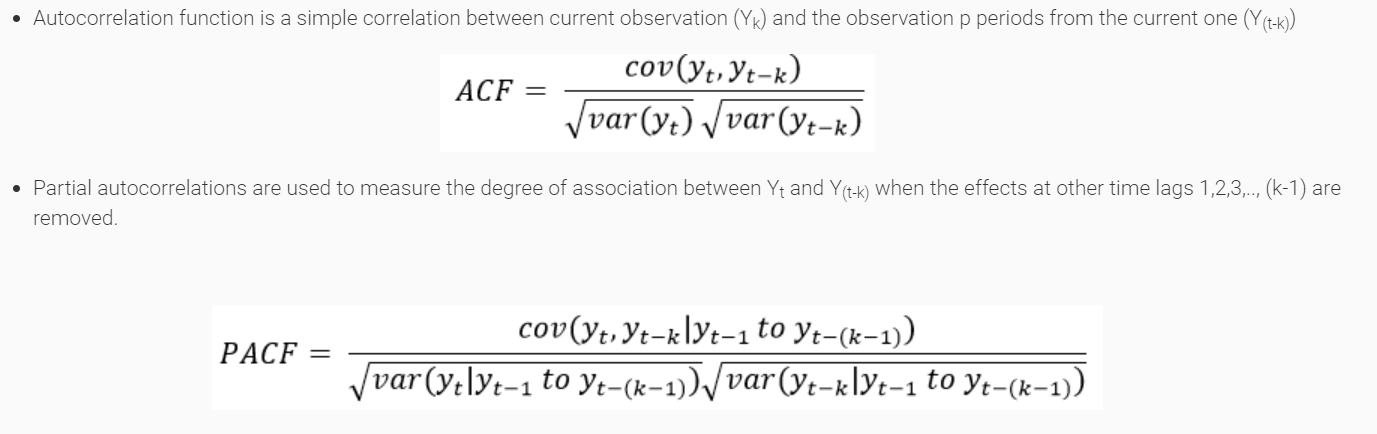

In [178]:
### If ACF value  abruptly comes very close to 0 - at this point we can take q value
# which means ratio of co var to sqrt of data is very low

In [180]:
from statsmodels.graphics.tsaplots import plot_acf


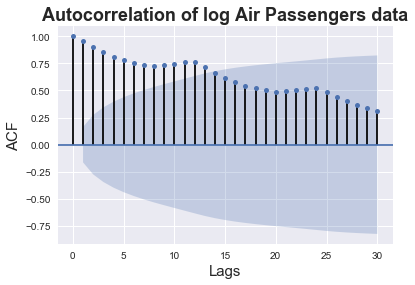

In [181]:
# ACF plot of log(Airpassengers)
plot_acf(np.log(AirPassenger), lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of log Air Passengers data', fontsize=18, weight='bold')
plt.show()

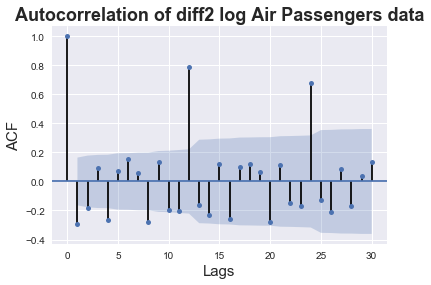

In [182]:
# ACF plot of diff2(log(Airpassengers))
plot_acf(np.diff(np.log(AirPassenger).T.values[0], 2), lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of diff2 log Air Passengers data', fontsize=18, weight='bold')
plt.show()

In [184]:
from statsmodels.graphics.tsaplots import plot_pacf


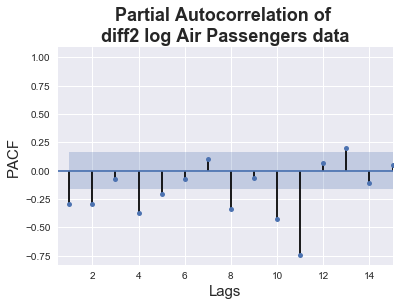

In [185]:

# PACF plot of diff2(log(Airpassengers))
plot_pacf(np.diff(np.log(AirPassenger).T.values[0], 2), lags=15)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('PACF', fontsize=15)
plt.xlim(0.5, 15)
plt.title('Partial Autocorrelation of \ndiff2 log Air Passengers data', fontsize=18, weight='bold')
plt.show()

In [188]:
## From plot above q=2 ,p=3 point looks close to 0  let see if it improves AIC
arimamodel = ARIMA(AirPassenger.astype(float), order=(2,2,3))
am=arimamodel.fit()
am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -688.300
Method:                       css-mle   S.D. of innovations             29.710
Date:                Fri, 08 Nov 2019   AIC                           1390.600
Time:                        15:15:44   BIC                           1411.290
Sample:                    03-01-1949   HQIC                          1399.008
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0055      0.074     -0.075      0.941      -0.151       0.140
ar.L1.D2.Passengers    -0.0142      0.053     -0.270      0.788      -0.117       0.089
ar.L2.D2.Passengers    -0.8201      0.055    -14.979      0.000      -0.927      -0.713
ma.L1.D2.Passengers    -0.7380      0.032    -23.242      0.000      -0.800      -0.676
ma.L2.D2.Passengers     0.7380        nan        nan        nan         nan         nan
ma.L3.D2.Passengers    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0087           -1.1042j            1.1042           -0.2512
AR.2           -0.0087           +1.1042j            1.1042            0.2512
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.1310           -0.9914j            1.0000           -0.2709
MA.3           -0.1310           +0.9914j            1.0000            0.2709
-----------------------------------------------------------------------------
"""

In [195]:
df  = pd.DataFrame({'P1':[10,20,30],'P2':[["A","B","C"],["A","D","E"],["C","D","F"]]})
df['P3'] = df["P2"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
print (df['P3'])
df.loc[:,'P2']

0    A B C
1    A D E
2    C D F
Name: P3, dtype: object


0    [A, B, C]
1    [A, D, E]
2    [C, D, F]
Name: P2, dtype: object

In [196]:
a=np.array([1,1,1])

In [204]:
arr = np.array([1,2,5,4,6,8,3,2,1,4,5,7,8,562,1,2,4,5])
arr.shape

(18,)

In [206]:
arr.reshape(3,-1)

array([[  1,   2,   5,   4,   6,   8],
       [  3,   2,   1,   4,   5,   7],
       [  8, 562,   1,   2,   4,   5]])

In [203]:
a.ravel?

In [212]:
mat1 = np.array([[ 0,  1,  2,  3],
                 [ 4,  5,  6,  7],
                 [ 8,  9, 10, 11]])

indA = np.array([[2,2],[1,1]])
indB = np.array([[2,1],[1,0]])

In [210]:
a=np.array([[100, 90],[50, 40]])
a

array([[100,  90],
       [ 50,  40]])

In [213]:
mat1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [215]:
indA

array([[2, 2],
       [1, 1]])

In [214]:
mat1[indA, indB]

array([[10,  9],
       [ 5,  4]])

In [217]:
mat1[indA, indB]=a
mat1

array([[  0,   1,   2,   3],
       [ 40,  50,   6,   7],
       [  8,  90, 100,  11]])

In [224]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0], 
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5]],
                   columns=list('ABCD'))
#df.cumsum(axis=1)
#df.dropna(axis = 1, how = 'all')
print(df.dropna(axis = 1, how='any'))
df.sub?

   D
0  0
1  1
2  5


In [225]:

df1 = pd.DataFrame({'A': [1,4,7],
                    'B': [2,5,8],
                    'C': [3,6,9]},
                    index = list('PQR'))
df3 = pd.DataFrame({'A': [1,-4,-7],
                    'B': [-2,5,-8],
                    'C': [-3,-6,9]},
                    index = list('STU'))
print(df1.sub(df3).count())

A    0
B    0
C    0
dtype: int64


In [226]:

df = pd.DataFrame([[15, 12],
                   [33, 54],
                   [10, 32]], 
                   index = ['one','two','three'],
                   columns = ['col1', 'col2'])

print(df.filter(regex = 'e$', axis = 0).shape)
print(df.filter(regex = '^c', axis = 1).shape)

(2, 2)
(3, 2)
